In [1]:
import pickle
import pandas as pd
import sklearn
import numpy as np
import scanpy as sc
import scipy.sparse
import anndata
import matplotlib.pylab as plt
from sklearn.decomposition import PCA
import copy
import logging as logg
from sklearn import preprocessing
import os 
import warnings
import scATAcat
import seaborn as sns
import random as rn 

warnings.filterwarnings('ignore')

In [2]:
# set the seed for reproducibility
sd = 1234
np.random.seed(sd)
rn.seed(sd)
%env PYTHONHASHSEED=0


env: PYTHONHASHSEED=0


#### define necessary parameters

In [3]:

results_dir = "../../../../../results/Supplementary_tables/analysis_on_different_projections/FACS_BM_scATAC/application_with_Corces2016_prototypes/projection_with_PCs_from_both_prototype_features"
output_dir = results_dir +"/outputs/"
figures_dir = results_dir +"/figures/"
data_dir = "../../../../../../../scATAcat_notebooks_for_paper/jan2024/data/"

for dir in [figures_dir, output_dir]:
    if not os.path.exists(dir):
        os.makedirs(dir)

### 0 - Load scATAC-seq data

In [4]:
ENCODE_coverage_per_cell_df= pickle.load(open(data_dir + 'Buenrostro2018_FACS_BM_scATAC/scATACseq/02_ENCODE_coverage_by_cell_matrix/scATAC_BM_Corces2018_ENCODE_coverage_per_cell_matrix_complete_sparse.pkl','rb'))


In [5]:
pd.read_csv(data_dir +"Buenrostro2018_FACS_BM_scATAC/scATACseq/02_ENCODE_coverage_by_cell_matrix/scATAC_BM_Corces2018_ENCODE_coverage_per_cell_matrix_complete_features.csv", index_col=0)

,cCREs.1
cCREs,
chr1_181251_181601,chr1_181251_181601
chr1_190865_191071,chr1_190865_191071
chr1_778562_778912,chr1_778562_778912
chr1_779086_779355,chr1_779086_779355
chr1_779727_780060,chr1_779727_780060
...,...
chrY_56842374_56842545,chrY_56842374_56842545
chrY_56844431_56844674,chrY_56844431_56844674
chrY_56857410_56857680,chrY_56857410_56857680


In [6]:
ENCODE_cCREs = pd.read_csv(data_dir +"Buenrostro2018_FACS_BM_scATAC/scATACseq/02_ENCODE_coverage_by_cell_matrix/scATAC_BM_Corces2018_ENCODE_coverage_per_cell_matrix_complete_features.csv", index_col=0)
ENCODE_cCREs.index.name = None
ENCODE_cCREs.columns = ['cCREs']
ENCODE_cCREs.head()

,cCREs
chr1_181251_181601,chr1_181251_181601
chr1_190865_191071,chr1_190865_191071
chr1_778562_778912,chr1_778562_778912
chr1_779086_779355,chr1_779086_779355
chr1_779727_780060,chr1_779727_780060


In [7]:
cell_IDs = pd.read_csv(data_dir +"Buenrostro2018_FACS_BM_scATAC/scATACseq/02_ENCODE_coverage_by_cell_matrix/scATAC_BM_Corces2018_ENCODE_coverage_per_cell_matrix_complete_cell_IDs.csv", index_col=0)
cell_IDs.index.name = None
cell_IDs.columns = ['cell_IDs']
cell_IDs.head()

,cell_IDs
CLP_0,CLP_0
CLP_1,CLP_1
CMP_0,CMP_0
CMP_1,CMP_1
CMP_2,CMP_2


### 1 - initialize the AnnData object

In [8]:
sc_completeFeatures_adata = anndata.AnnData(ENCODE_coverage_per_cell_df.transpose(), var=ENCODE_cCREs, obs=cell_IDs)


In [9]:
sc_completeFeatures_adata

AnnData object with n_obs × n_vars = 2210 × 926535
    obs: 'cell_IDs'
    var: 'cCREs'

### 2 - add binary layer to AnnData

In [10]:
scATAcat.add_binary_layer(sc_completeFeatures_adata, binary_layer_key="binary")

AnnData object with n_obs × n_vars = 2210 × 926535
    obs: 'cell_IDs'
    var: 'cCREs'
    layers: 'binary'

## 3- calculate & plot cell and feature statistics

In [11]:
scATAcat.cell_feature_statistics(sc_completeFeatures_adata, binary_layer_key ='binary')

AnnData object with n_obs × n_vars = 2210 × 926535
    obs: 'cell_IDs'
    var: 'cCREs'
    obsm: 'num_feature_per_cell'
    varm: 'num_cell_per_feature'
    layers: 'binary'

AnnData object with n_obs × n_vars = 2210 × 926535
    obs: 'cell_IDs'
    var: 'cCREs'
    obsm: 'num_feature_per_cell'
    varm: 'num_cell_per_feature'
    layers: 'binary'

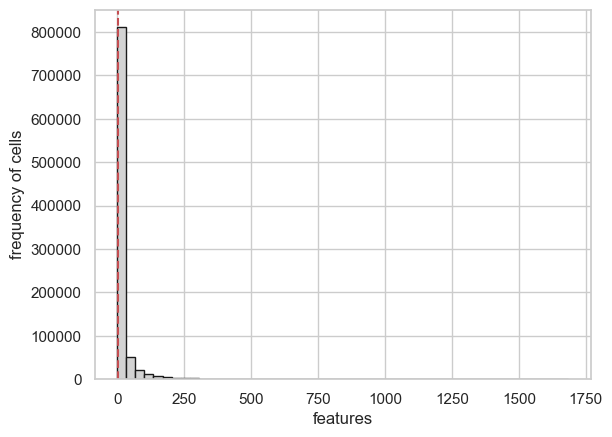

In [12]:
scATAcat.plot_feature_statistics(sc_completeFeatures_adata, threshold=3, bins=50, color="lightgrey", save=True, save_dir = figures_dir +"/feature_statistics_plot.png")

AnnData object with n_obs × n_vars = 2210 × 926535
    obs: 'cell_IDs'
    var: 'cCREs'
    obsm: 'num_feature_per_cell'
    varm: 'num_cell_per_feature'
    layers: 'binary'

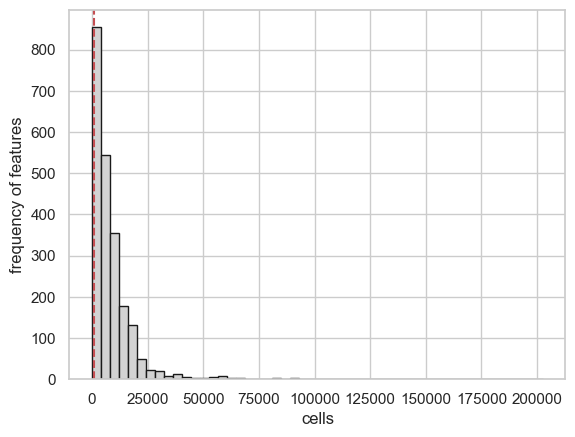

In [13]:
scATAcat.plot_cell_statistics(sc_completeFeatures_adata, threshold=1000, bins=50, color="lightgrey", save=True, save_dir = figures_dir + "/cell_statistics_plot.png")

## 4- filter the cells and features

In [14]:
sc_completeFeatures_adata

AnnData object with n_obs × n_vars = 2210 × 926535
    obs: 'cell_IDs'
    var: 'cCREs'
    obsm: 'num_feature_per_cell'
    varm: 'num_cell_per_feature'
    layers: 'binary'

In [15]:
sc_filteredFeatures_adata = scATAcat.preproces_sc_matrix(sc_completeFeatures_adata,cell_cutoff=1000,cell_cutoff_max=80000, feature_cutoff=3, remove_chrY = True, var_key = 'cCREs', copy=True)

In [16]:
sc_filteredFeatures_adata

View of AnnData object with n_obs × n_vars = 1872 × 501699
    obs: 'cell_IDs'
    var: 'cCREs'
    obsm: 'num_feature_per_cell'
    varm: 'num_cell_per_feature'
    layers: 'binary'

#### note that here we filtered almost half of the features!

### 5- load & preprocess the bulk data

In [17]:
bulk_by_ENCODE_peaks_df_annotated =  pickle.load(open(data_dir + "Corces2016_bulk_ATAC/02_ENCODE_coverage_by_prototypes_matrix/Corces2016bulkATAC_ENCODE_cCRE_overlappingPeaks_annotated.pkl", 'rb'))
bulk_by_ENCODE_peaks_df_annotated = bulk_by_ENCODE_peaks_df_annotated.reindex(sorted(bulk_by_ENCODE_peaks_df_annotated.columns), axis=1)

In [18]:
bulk_by_ENCODE_peaks_df_annotated = bulk_by_ENCODE_peaks_df_annotated[['CLP_1', 'CLP_2', 'CLP_3',
       'CLP_4', 'CLP_5', 'CMP_1', 'CMP_2', 'CMP_3', 'CMP_4', 'CMP_5', 'CMP_6',
       'CMP_7', 'CMP_8', 'GMP_1', 'GMP_2', 'GMP_3', 'GMP_4', 'GMP_5', 'GMP_6',
       'GMP_7', 'HSC_1', 'HSC_2', 'HSC_3', 'HSC_4', 'HSC_5', 'HSC_6', 'HSC_7',
       'LMPP_1', 'LMPP_2', 'LMPP_3', 'MEP_1', 'MEP_2', 'MEP_3', 'MEP_4',
       'MEP_5', 'MEP_6', 'MEP_7', 'MPP_1', 'MPP_2', 'MPP_3', 'MPP_4', 'MPP_5',
       'MPP_6']]

In [19]:
bulk_by_ENCODE_peaks_df_annotated.head()

,CLP_1,CLP_2,CLP_3,CLP_4,CLP_5,CMP_1,CMP_2,CMP_3,CMP_4,CMP_5,...,MEP_4,MEP_5,MEP_6,MEP_7,MPP_1,MPP_2,MPP_3,MPP_4,MPP_5,MPP_6
chr1_181251_181601,0,5,0,0,0,0,1,9,7,3,...,3,4,7,10,0,4,1,2,5,10
chr1_190865_191071,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
chr1_778562_778912,72,94,78,64,23,96,83,192,115,84,...,58,84,291,252,96,193,131,52,268,420
chr1_779086_779355,11,10,10,9,0,12,15,16,19,8,...,8,11,34,33,13,20,9,7,43,72
chr1_779727_780060,4,4,2,0,0,0,1,3,0,0,...,2,5,7,4,0,1,2,0,5,8


In [20]:
bulk_completeFeatures_adata = scATAcat.generate_bulk_sparse_AnnData(bulk_by_ENCODE_peaks_df_annotated)

In [21]:
bulk_completeFeatures_adata

AnnData object with n_obs × n_vars = 43 × 926535
    obs: 'cell_types'
    var: 'cCREs'

In [22]:
bulk_completeFeatures_adata = scATAcat.preprocess_bulk_adata(bulk_completeFeatures_adata, remove_chrY=True, var_key = 'cCREs', copy=False)

### 6 - Overlap bulk and sc features

- before we proceed with sc analysis, we need to overlap the features:
    - we don't want the feature that does not have any counts in bulk data to influence clustering
    - similarly, we want the projection to be defined only with the same feature set

In [23]:
sc_bulk_common_vars = scATAcat.overlap_vars(sc_filteredFeatures_adata, bulk_completeFeatures_adata)

In [24]:
len(sc_bulk_common_vars)

501699

In [25]:
sc_commonFeatures_adata = scATAcat.subset_adata_vars(sc_filteredFeatures_adata, vars_list=sc_bulk_common_vars, copy_=True)


In [26]:
bulk_commonFeatures_adata = scATAcat.subset_adata_vars(bulk_completeFeatures_adata, vars_list=sc_bulk_common_vars, copy_=True)


### 7- doublet removal. As the data is genetated with sorted single cells, we did not perform doublet removal

## 8- apply TF-IDF

In [27]:
scATAcat.apply_TFIDF_sparse(sc_commonFeatures_adata, binary_layer_key='binary', TFIDF_key='TF_logIDF' )

AnnData object with n_obs × n_vars = 1872 × 501699
    obs: 'cell_IDs'
    var: 'cCREs'
    obsm: 'num_feature_per_cell'
    varm: 'num_cell_per_feature'
    layers: 'binary', 'TF_logIDF'

## 9 - subset matrices to differential cCREs

In [28]:
pairwise_top2000_cCREs = pd.read_table("../../../../../../data/Corces2016_bulk_ATAC/03_get_differentially_accessible_regions/only_progenitors-for_FACS_BM_scATAC/Corces2016_pairwise_differential_cCREs_FDR0.05_top2000_sorted_exactCREs.csv",delimiter="\t",header=None)
pairwise_top2000_cCREs.head()

,0
0,chr1_1842820_1843169
1,chr1_1895700_1895891
2,chr1_1895944_1896292
3,chr1_1966481_1966686
4,chr1_2045674_2045954


In [29]:
len(pairwise_top2000_cCREs)

21034

In [30]:
common_differential_vars = list(set(list(sc_bulk_common_vars)) & set(list(pairwise_top2000_cCREs[0].tolist())))

len(common_differential_vars)

19412

In [31]:
bulk_commonDiffFeatures_adata = scATAcat.subset_adata_vars(bulk_commonFeatures_adata,
                                                 vars_list=common_differential_vars,
                                                 copy_=True)

In [32]:
sc_commonDiffFeatures_adata = scATAcat.subset_adata_vars(sc_commonFeatures_adata,
                                                 vars_list=common_differential_vars,
                                                 copy_=True)

### 10- dimention reduction and clustering 

In [33]:
sc_commonDiffFeatures_adata

AnnData object with n_obs × n_vars = 1872 × 19412
    obs: 'cell_IDs'
    var: 'cCREs'
    obsm: 'num_feature_per_cell'
    varm: 'num_cell_per_feature'
    layers: 'binary', 'TF_logIDF'

In [34]:
scATAcat.apply_PCA(sc_commonDiffFeatures_adata, layer_key ='TF_logIDF', svd_solver='arpack', random_state=0)


AnnData object with n_obs × n_vars = 1872 × 19412
    obs: 'cell_IDs'
    var: 'cCREs'
    uns: 'pca'
    obsm: 'num_feature_per_cell', 'X_pca'
    varm: 'num_cell_per_feature', 'PCs'
    layers: 'binary', 'TF_logIDF'

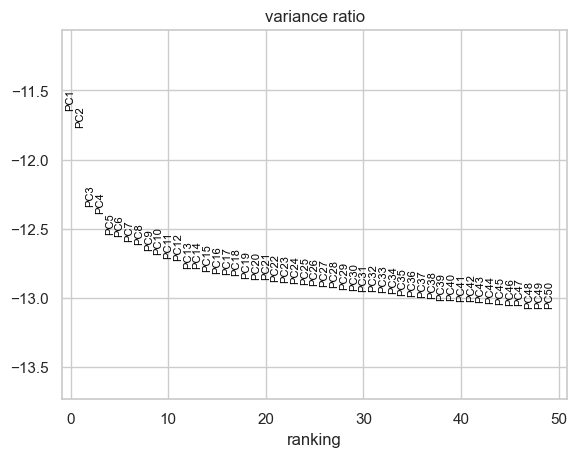

In [35]:
with plt.rc_context():
    sc.pl.pca_variance_ratio(sc_commonDiffFeatures_adata, n_pcs=50, log=True, show=False)
    plt.savefig(figures_dir + "/pca_variance_ratio.pdf", bbox_inches="tight")

In [36]:
sc.pp.neighbors(sc_commonDiffFeatures_adata, n_pcs = 50, n_neighbors = 30, random_state=0)


Text(34.875, 0.5, 'num_feature_per_cell')

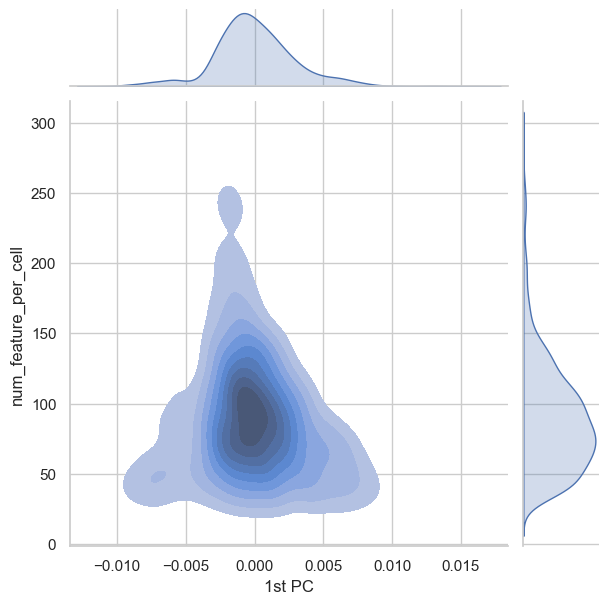

In [37]:
seqDepth_PC1_plot = sns.jointplot(
    x=sc_commonDiffFeatures_adata.obsm['X_pca'][:,0],
    y=np.sqrt(sc_commonDiffFeatures_adata.obsm['num_feature_per_cell']),
    kind="kde",fill=True
)
plt.xlabel("1st PC")
plt.ylabel("num_feature_per_cell")

In [38]:
## correlation
np.corrcoef(sc_commonDiffFeatures_adata.obsm['X_pca'][:,0],
    np.sqrt(sc_commonDiffFeatures_adata.obsm['num_feature_per_cell']))

array([[ 1.        , -0.17483139],
       [-0.17483139,  1.        ]])

### 11 -  apply UMAP & leiden clustering

In [39]:
leiden_resolution=1.0
leiden_key="leiden_"+ str(leiden_resolution)

In [40]:
sc.tl.umap(sc_commonDiffFeatures_adata, random_state=0)

In [41]:
sc.tl.leiden(sc_commonDiffFeatures_adata, resolution=leiden_resolution,key_added=leiden_key, random_state=0)

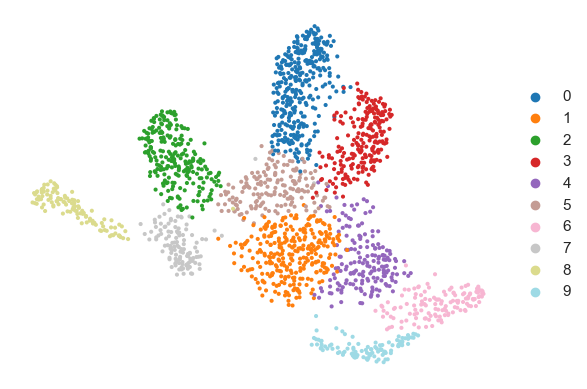

In [42]:
sc.pl.umap(sc_commonDiffFeatures_adata, color=leiden_key, show=True,size=35 , add_outline=False, frameon=False, title="",palette="tab20")

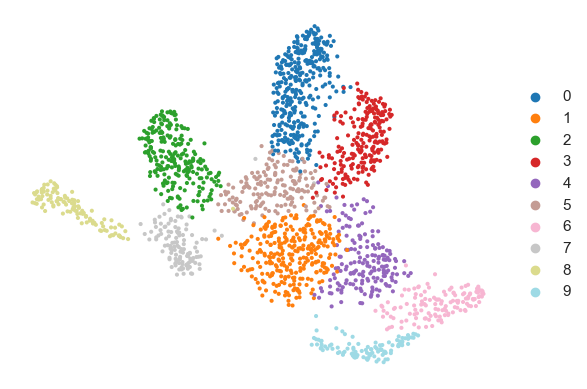

In [43]:
with plt.rc_context():
    sc.pl.umap(sc_commonDiffFeatures_adata, color=leiden_key, show=False,size=35 , add_outline=False, frameon=False, title="",palette="tab20")
    plt.savefig(figures_dir + "/"+ leiden_key+ ".pdf", bbox_inches="tight")

In [44]:
# add cell types as obs
sc_commonDiffFeatures_adata.obs["cell_type"] = [r.split('_')[0] for r in sc_commonDiffFeatures_adata.obs.cell_IDs]
sc_commonDiffFeatures_adata.obs

,cell_IDs,leiden_1.0,cell_type
CLP_1,CLP_1,8,CLP
CMP_0,CMP_0,4,CMP
CMP_1,CMP_1,4,CMP
CMP_2,CMP_2,1,CMP
CMP_3,CMP_3,6,CMP
...,...,...,...
LMPP_90,LMPP_90,7,LMPP
LMPP_91,LMPP_91,7,LMPP
LMPP_93,LMPP_93,7,LMPP
LMPP_94,LMPP_94,7,LMPP


In [45]:
# manually set new colors # E4E858
sc_commonDiffFeatures_adata.uns['cell_type_colors'] =['#82018F',  "#BDB0D9", "#92929C","#BAE33A", "#7ED9B7", "#008F8C", "#275974"]

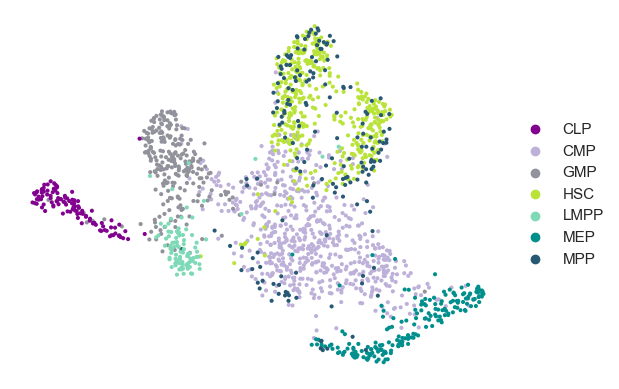

In [46]:
with plt.rc_context(): 
    sc.pl.umap(sc_commonDiffFeatures_adata, color='cell_type', add_outline=False, frameon=False,title ="", show=False, size=35 )
    plt.savefig(figures_dir + "/cell_types_umap_matching_colors.pdf", bbox_inches="tight")

#### loook at sequencing depth

In [47]:
sc_commonDiffFeatures_adata.obs['num_feature_per_cell_'] = sc_commonDiffFeatures_adata.obsm['num_feature_per_cell']

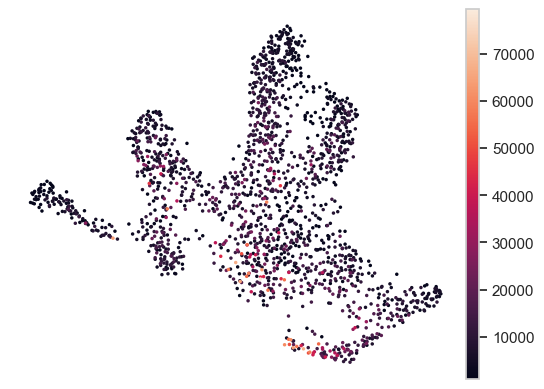

<Figure size 640x480 with 0 Axes>

In [48]:

with plt.rc_context():  
    sc.pl.umap(sc_commonDiffFeatures_adata, color='num_feature_per_cell_', add_outline=False, frameon=False,title ="", save=False, size=25 )
    plt.savefig(figures_dir + "/seq_depth_umap.pdf", bbox_inches="tight")

### 12 - from pseudobulks according to the cluster assignments


In [49]:
cell_cluster_assignments = pd.DataFrame(sc_commonDiffFeatures_adata.obs[leiden_key].copy())
cell_cluster_assignments


,leiden_1.0
CLP_1,8
CMP_0,4
CMP_1,4
CMP_2,1
CMP_3,6
...,...
LMPP_90,7
LMPP_91,7
LMPP_93,7
LMPP_94,7


In [50]:
cell_cluster_sizes = pd.DataFrame(cell_cluster_assignments[leiden_key].value_counts())
cell_cluster_sizes['leiden_clusters'] = cell_cluster_sizes.index
cell_cluster_sizes.head()

,count,leiden_clusters
leiden_1.0,,
0,344,0
1,286,1
2,233,2
3,212,3
4,174,4


In [51]:
for clust_id in set(sc_commonDiffFeatures_adata.obs[leiden_key].values):
    clust_df= sc_commonDiffFeatures_adata[sc_commonDiffFeatures_adata.obs[leiden_key]==clust_id]

In [52]:
cell_types = ([(r.split('_')[0]) for r in clust_df.obs[leiden_key].index])

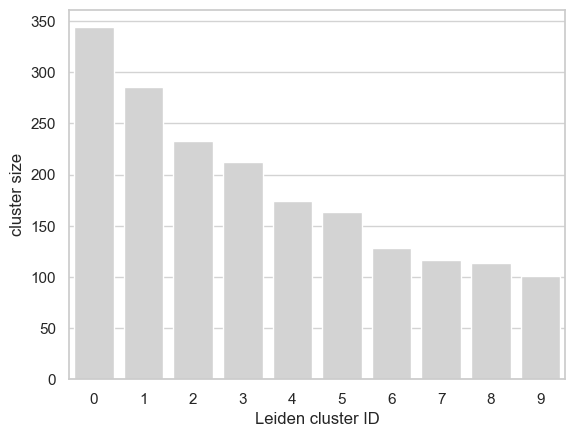

In [53]:
# plot a bar chart
sns.set_style("whitegrid")
ax= sns.barplot(
    y="count", 
    x="leiden_clusters", 
    data=cell_cluster_sizes, 
    color='lightgrey');
ax.yaxis.grid(True,color="lightgrey")
ax.axes.set_xlabel("Leiden cluster ID")
ax.axes.set_ylabel("cluster size")
#atickt(yticks=(list(range(0,1500,100))))
plt.savefig(figures_dir + "/cluster_sizes_"+leiden_key+".pdf", dpi=250)

In [54]:
pseudobulk_commonFeatures_adata = scATAcat.generate_bulk_sparse_AnnData(scATAcat.get_pseudobulk_matrix_ext(adata_to_subset=sc_commonFeatures_adata, adata_to_get_clusters=sc_commonDiffFeatures_adata, cluster_key=leiden_key  ,method = 'sum'))

In [55]:
scATAcat.preprocessing_libsize_norm_log2(pseudobulk_commonFeatures_adata)

AnnData object with n_obs × n_vars = 10 × 501699
    obs: 'cell_types'
    var: 'cCREs'
    layers: 'libsize_norm_log2'

In [56]:
scATAcat.preprocessing_libsize_norm_log2(bulk_commonFeatures_adata)

AnnData object with n_obs × n_vars = 43 × 501699
    obs: 'cell_types'
    var: 'cCREs'
    layers: 'libsize_norm_log2'

### 13 - Projection


#### processing 

In [57]:
bulk_commonDiffFeatures_adata = scATAcat.subset_adata_vars(bulk_commonFeatures_adata,
                                                 vars_list=common_differential_vars,
                                                 copy_=True)

In [58]:
bulk_commonDiffFeatures_adata

AnnData object with n_obs × n_vars = 43 × 19412
    obs: 'cell_types'
    var: 'cCREs'
    layers: 'libsize_norm_log2'

In [59]:
pseudobulk_commonDiffFeatures_adata = scATAcat.subset_adata_vars(pseudobulk_commonFeatures_adata,
                                                 vars_list=common_differential_vars,
                                                 copy_=True)

### combine AnnData objects

In [60]:
adatas = {
    "bulk": bulk_commonDiffFeatures_adata,
    "pseudobulk": pseudobulk_commonDiffFeatures_adata}
combined_commonDiffFeatures_adata =anndata.concat(adatas, label="dataset")
combined_commonDiffFeatures_adata.var = pseudobulk_commonDiffFeatures_adata.var
combined_commonDiffFeatures_adata

AnnData object with n_obs × n_vars = 53 × 19412
    obs: 'cell_types', 'dataset'
    var: 'cCREs'
    layers: 'libsize_norm_log2'

In [61]:
combined_commonDiffFeatures_adata = scATAcat.preprocessing_standardization(combined_commonDiffFeatures_adata, input_layer_key="libsize_norm_log2", zero_center=True)

adding std with default keywords
adding mean with default keywords


In [62]:
 def projection_with_combined_PCs(combined_adata, layer_key='libsize_norm_log2_std', prototype_label_font_size = 18, pseudobulk_label_font_size = 18, prototype_colors = None, prototype_cmap=None, pseudobulk_cmap=None, pseudobulk_colors = None, color_key = "clustering_color", pseudobulk_point_size=180, prototype_point_size=150, pseudobulk_point_alpha=0.8, prototype_point_alpha=0.7, prototype_legend = True, pseudobulk_legend = True, save_path = None, dpi = 300, fig_size_inches = (15,15)):
    '''
    Custom 3D PCA projection of prototypes and pseudobulks:projection_with_combined_PCs

    Parameters:
    - prototype_adata (AnnData): An AnnData object containing the prototype count matrix.
    - pseudobulk_adata(AnnData): An AnnData object containing the pseudobulk count matrix.
    - prototype_layer_key (str): The key for accessing the prototype layer for projection. Default 'libsize_norm_log2_std'.
    - pseudobulk_layer_key (str): The key for accessing the pseudobulk layer for projection. Default 'libsize_norm_log2_bulk_scaled'
    - prototype_label_font_size (int): Font size of the prototype labels on the PCA projection. If set to 0, no labels will be plotted. Default 18. 
    - pseudobulk_label_font_size (int): Font size of the pseudobulk labels on the PCA projection. If set to 0, no labels will be plotted. Default 18.    
    - prototype_colors (List[str ]or None): A list of color codes to be used for plotting prototypes. If `None`, colors will be chosen by `cmap` parameter.
    - cmap (str): Matplotlib colormap used to colorcode the prototypes if prototype_colors is None.
    - pseudobulk_colors (List[str] or None): A list of color codes to be used for plotting pseudobulks. If `None`, colors will be determined by `color_key` parameter
    - color_key (str, optional): The key for accessing the cluster colors in the sc data. If provided, the pseudobulk points will be colored based on the cluster colors they originated from.
    - pseudobulk_point_size (int): Size of the pseudobulk point displayed on the plot. Default 180.
    - prototype_point_size (int): Size of the prototype point displayed on the plot. Default 200.
    - pseudobulk_point_alpha (float): Parameter controling the transparency of the plotted pseudobulks. Ranges between 0 (transparent) and 1 (opaque). Default 0.8.
    - prototype_point_alpha (float): Parameter controling the transparency of the plotted prototypes. Ranges between 0 (transparent) and 1 (opaque). Default 0.7.
    - prototype_legend (bool): A boolean value indicating whether or not to include prototype-related items in the legend. Deault True.
    - pseudobulk_legend(bool): A boolean value indicating whether or not to include pseudobulk-related items in the legend. Deault True.
    - save_path (str or None): Path where the plot should be saved. If `None`, the plot is not saved.
    - dpi (int): The resolution in dots per inch. Default 300.
    - fig_size_inches (tuple): A tuple representing the size (width, height) of the figure in inches. Default (15,15).

    Returns: 
    - 3D PCA projection figure.
    - PCA transformed values of prototypes.
    - PCA transformed values of pseudbulks.

    '''

    # Number of pseudobulk samples and PCA component selection
    num_of_samples = combined_adata.n_obs
    n_comp = 30 if num_of_samples > 30 else num_of_samples
    
    # Perform PCA
    pca_combined = PCA(n_components=n_comp)
    pca_combined_train = pca_combined.fit_transform(combined_adata.layers[layer_key])
    pca_combined_train_df = pd.DataFrame(data=pca_combined_train, columns=[f"principal component {i}" for i in range(n_comp)])
    pca_combined_train_df["targets"] = combined_adata.obs.index


    prototype_pca_df = pca_combined_train_df[~pca_combined_train_df['targets'].str.startswith("clust")]
    pseudobulk_pca_df = pca_combined_train_df[pca_combined_train_df['targets'].str.startswith("clust")]



    # sort pseudobulk adata so that ther cluster order matches the cluster color order
    pseudobulk_pca_df["sort_index"] = pseudobulk_pca_df["targets"].str.extract('(\d+)')
    pseudobulk_pca_df["sort_index"] = pseudobulk_pca_df["sort_index"].astype(int)
    pseudobulk_pca_df.sort_values(by=["sort_index"], inplace=True)

    prototype_pca_df_w_labels = prototype_pca_df.copy()
    prototype_pca_df_w_labels["cell_type"] = prototype_pca_df_w_labels['targets'].apply(lambda r: '_'.join(r.split('_')[:-1]))
    my_color=pd.Series(pd.Categorical(prototype_pca_df_w_labels["cell_type"])).cat.codes
    prototype_pca_df_w_labels["color_id"] = my_color
    # plot
    fig = plt.figure()
    ax = plt.axes(projection='3d',computed_zorder=False)

    PC1 = pseudobulk_pca_df['principal component 0'].values
    PC2 = pseudobulk_pca_df['principal component 1'].values
    PC3 = pseudobulk_pca_df['principal component 2'].values

    pseudobulk_CELLTYPES = pseudobulk_pca_df["targets"].values
    pseudobulk_CELLTYPES_unique = np.unique(pseudobulk_CELLTYPES)
    # CELLTYPES = pseudobulk_CELLTYPES
    # CELLTYPES_ = np.unique(CELLTYPES)

    if pseudobulk_colors is None:
    # get as many colors as the number of pseudobulks
        if pseudobulk_cmap is None:
            pseudobulk_cmap="hsv"
        else:
            pseudobulk_cmap=pseudobulk_cmap
            
        import matplotlib.colors as mcolors
        num_of_pseudobulks = len(pseudobulk_CELLTYPES_unique)
        colors = plt.cm.get_cmap(pseudobulk_cmap, num_of_pseudobulks)
        pseudobulk_COLORS = [mcolors.rgb2hex(colors(i)) for i in range(num_of_pseudobulks)]
    else: 
        pseudobulk_COLORS = pseudobulk_colors

    for pseudobulk_cell_type, color in zip(pseudobulk_CELLTYPES_unique, pseudobulk_COLORS):
        idxs = np.where(pseudobulk_CELLTYPES == pseudobulk_cell_type)
        # control the legend
        if pseudobulk_legend == True:
            ax.scatter(PC1[idxs,], PC2[idxs,],PC3[idxs,], label=pseudobulk_cell_type,
                       s=pseudobulk_point_size, color=color, alpha=pseudobulk_point_alpha, zorder=4.5)
        else:
            ax.scatter(PC1_[idxs,], PC2[idxs,],PC3[idxs,],
                       s=pseudobulk_point_size, color=color, alpha=pseudobulk_point_alpha, zorder=4.5)   
    # pseudobulk labels on the plot
    m= np.array([list(PC1),list(PC2),list(PC3)])
    for i in range(len(m[0])): #plot each point + it's index as text above
        ax.text(m[0,i],m[1,i],m[2,i],  '%s' % ('  ' +pseudobulk_CELLTYPES[i]), fontsize=pseudobulk_label_font_size)

    prototype_CELLTYPES =  prototype_pca_df_w_labels["cell_type"].values
    prototype_CELLTYPES_unique = np.unique(prototype_CELLTYPES)
    # CELLTYPES_ = prototype_CELLTYPES
    
    PC1_ = prototype_pca_df_w_labels['principal component 0'].values
    PC2_ = prototype_pca_df_w_labels['principal component 1'].values
    PC3_ = prototype_pca_df_w_labels['principal component 2'].values
    # colors for prototype samples 
    if prototype_colors is None:
        if cmap is None:
            cmap="twilight_shifted"
        else:
            cmap=cmap
        prototype_COLORS = mcp.gen_color(cmap=cmap,n=len(prototype_CELLTYPES_unique))
    else:
        prototype_COLORS = prototype_colors
    for prototype_cell_type, color in zip(prototype_CELLTYPES_unique, prototype_COLORS):
        idxs = np.where(prototype_CELLTYPES == prototype_cell_type)
        # control the legend
        if prototype_legend == True:
            ax.scatter(PC1_[idxs,], PC2_[idxs,],PC3_[idxs,], label=prototype_cell_type,
                       s=prototype_point_size, color=color, alpha=prototype_point_alpha, marker = "v",zorder=4.4)
        else:
            ax.scatter(PC1_[idxs,], PC2_[idxs,],PC3[_idxs,], s=prototype_point_size, color=color, alpha=prototype_point_alpha, marker = "v",zorder=4.4)
                
    
    # pseudobulk labels on the plot
    m= np.array([list(PC1_),list(PC2_),list(PC3_)])
    for i in range(len(m[0])):
        ax.text(m[0,i],m[1,i],m[2,i],  '%s' % ('  ' +prototype_CELLTYPES[i]), fontsize=prototype_label_font_size)

    #fig
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_facecolor('white')
    if not (prototype_legend == False and pseudobulk_legend == False):
        ax.legend(ncol=2,handleheight=2.4, labelspacing=0.05)
    figure = plt.gcf() 
    figure.set_size_inches(fig_size_inches)

    # save
    if save_path is not None:
        fig.savefig(save_path)
    return fig,prototype_pca_df_w_labels,pseudobulk_pca_df


In [63]:
leiden_key

'leiden_1.0'

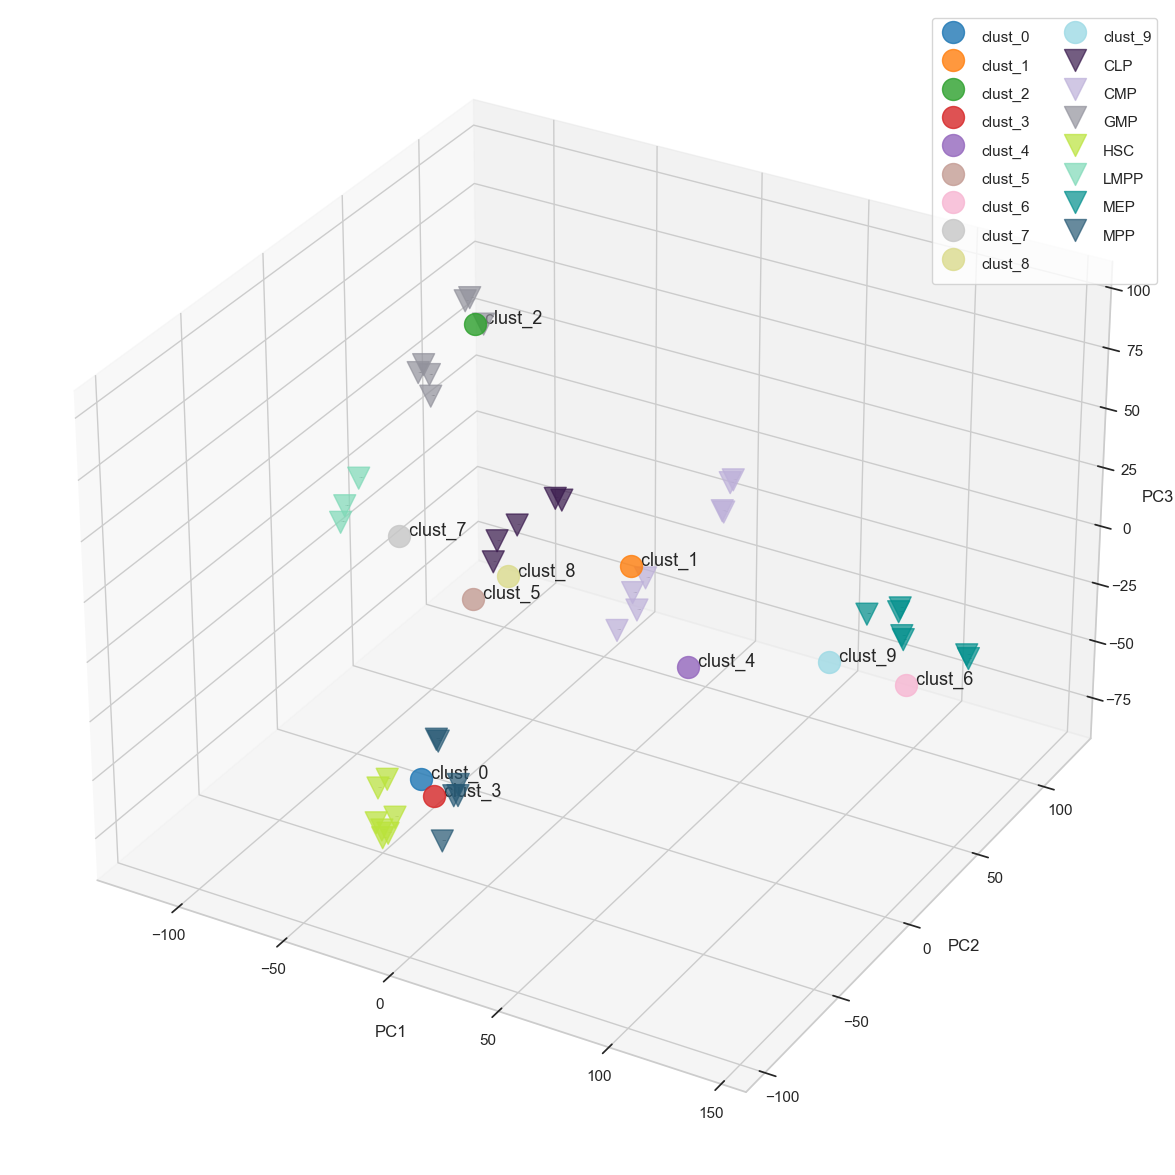

In [64]:
result= projection_with_combined_PCs(combined_adata=combined_commonDiffFeatures_adata, layer_key='libsize_norm_log2_std', color_key=leiden_key, pseudobulk_label_font_size =13, prototype_label_font_size = 0,
prototype_colors = ['#38184C',  "#BDB0D9", "#92929C","#BAE33A", "#7ED9B7", "#008F8C", "#275974"], pseudobulk_colors =  sc_commonDiffFeatures_adata.uns[leiden_key+ '_colors'], pseudobulk_point_size=250, prototype_point_size=250, pseudobulk_point_alpha=0.8, prototype_point_alpha=0.7, prototype_cmap='twilight_shifted', prototype_legend = True, pseudobulk_legend = True, save_path = figures_dir + "projection.png")

### 14 - Assign annotatiosn to clusters


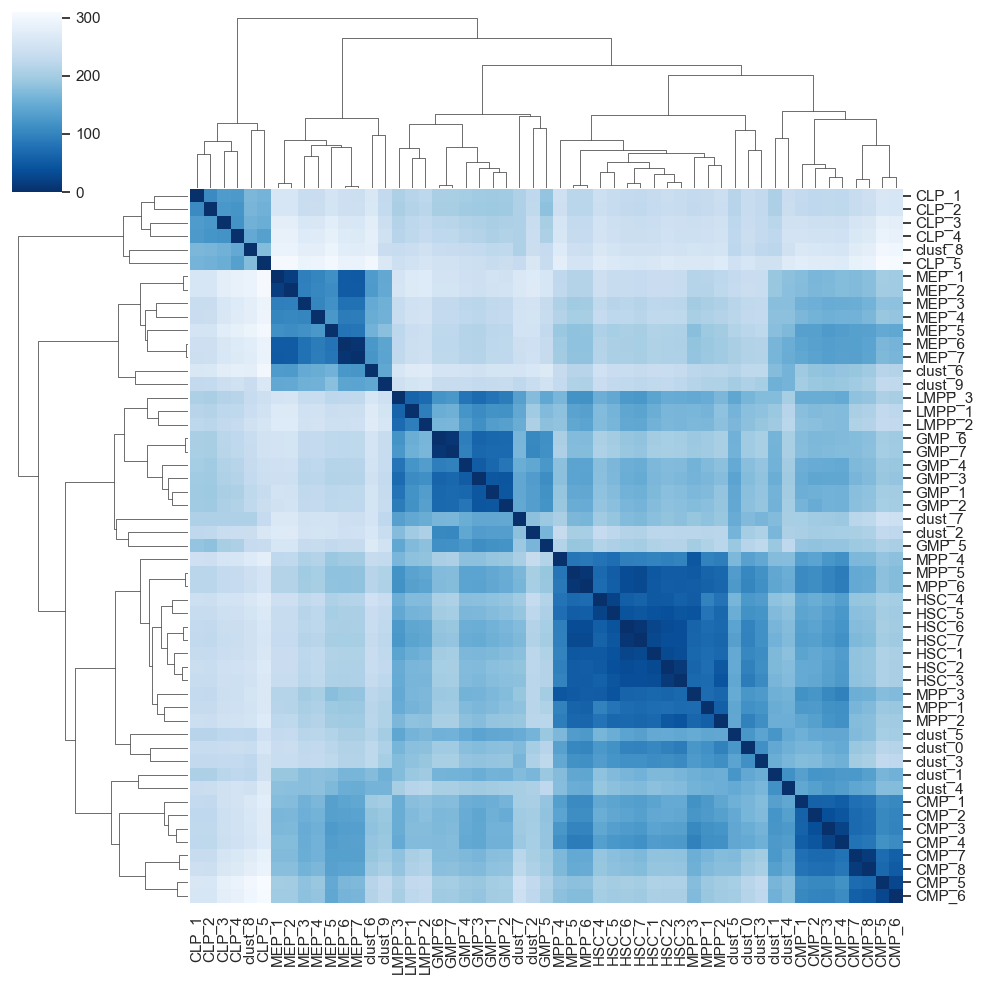

In [65]:
heatmap = scATAcat.plot_pca_dist_heatmap(result[1],result[2])

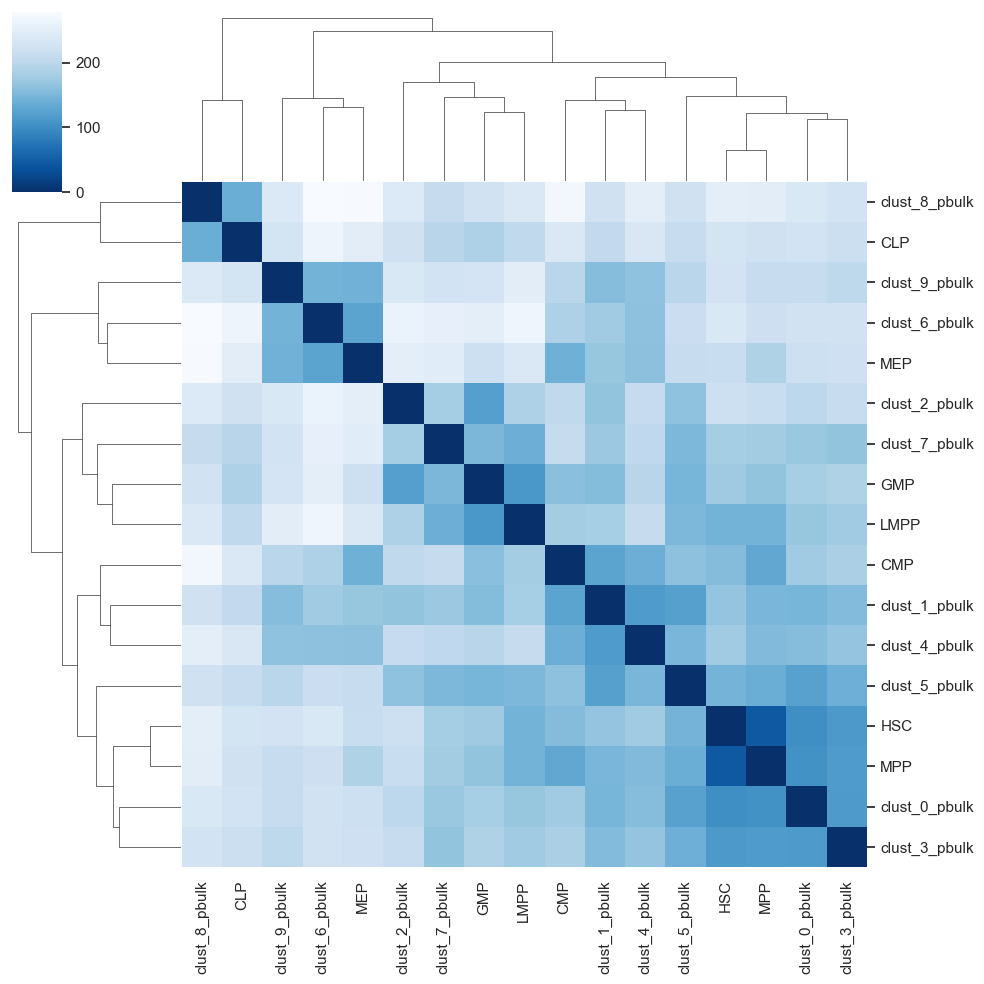

In [66]:
centroid_heatmap =  scATAcat.plot_pca_dist_cent_heatmap(result[1],result[2])


In [67]:
heatmap[0].savefig(figures_dir +"/heatmap.png") 
centroid_heatmap[0].savefig(figures_dir +"/centroid_heatmap.png") 


In [68]:
scATAcat.get_closest_prototype_to_pseudobulk(centroid_heatmap[1])

{'clust_0_pbulk': 'HSC',
 'clust_1_pbulk': 'CMP',
 'clust_2_pbulk': 'GMP',
 'clust_3_pbulk': 'HSC',
 'clust_4_pbulk': 'CMP',
 'clust_5_pbulk': 'MPP',
 'clust_6_pbulk': 'MEP',
 'clust_7_pbulk': 'LMPP',
 'clust_8_pbulk': 'CLP',
 'clust_9_pbulk': 'MEP'}

In [69]:
clusterID_prediction_dict = scATAcat.get_closest_prototype_to_pseudobulk(centroid_heatmap[1])
clusterID_prediction_dict

{'clust_0_pbulk': 'HSC',
 'clust_1_pbulk': 'CMP',
 'clust_2_pbulk': 'GMP',
 'clust_3_pbulk': 'HSC',
 'clust_4_pbulk': 'CMP',
 'clust_5_pbulk': 'MPP',
 'clust_6_pbulk': 'MEP',
 'clust_7_pbulk': 'LMPP',
 'clust_8_pbulk': 'CLP',
 'clust_9_pbulk': 'MEP'}

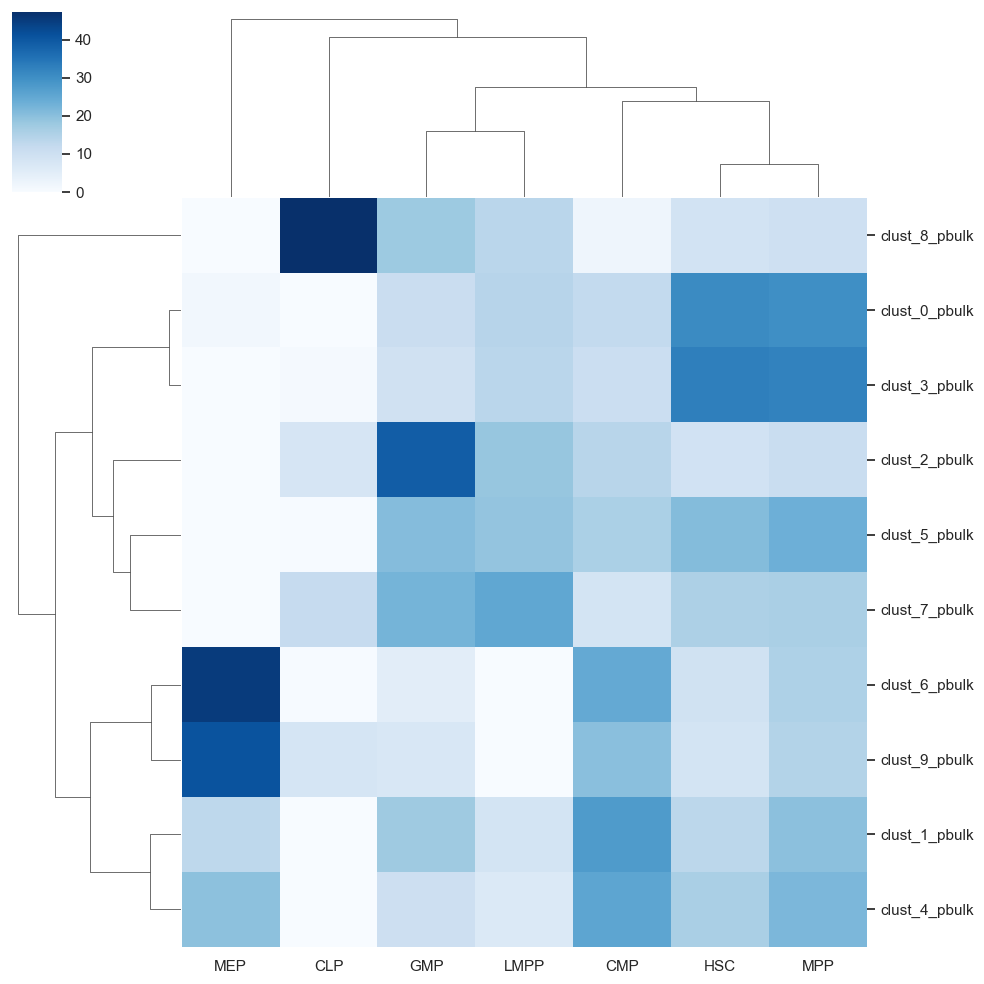

In [70]:
cluster_to_pseudobulk_heatmap_plot = sns.clustermap(scATAcat.get_pseudobulk_to_prototype_distance(centroid_heatmap[1], pbulk_to_prototype=True).T,yticklabels=True,xticklabels=True, cmap="Blues")

In [71]:
cluster_to_pseudobulk_heatmap_plot.savefig(figures_dir+"/cluster_to_pseudobulk_heatmap_plot.png") 


In [72]:
cluster_to_pseudobulk_heatmap_plot.savefig(figures_dir+"/cluster_to_pseudobulk_heatmap_plot.svg") 


In [73]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

cluster_to_pseudobulk_heatmap_plot.savefig(figures_dir+"/cluster_to_pseudobulk_heatmap_plot.pdf") 


### 15- Post hoc analysis

In [74]:
cell_cluster_assignments_with_predictions = copy.deepcopy(cell_cluster_assignments)

#### match the clusterID with predicted cell type

In [75]:
# convert the cell id column to character 
cell_cluster_assignments_with_predictions[leiden_key] = cell_cluster_assignments_with_predictions[leiden_key].astype(str)

In [76]:
cell_cluster_assignments_with_predictions.head()

,leiden_1.0
CLP_1,8
CMP_0,4
CMP_1,4
CMP_2,1
CMP_3,6


In [77]:
# refortmat the dict suct that it mactes the clust ID col
clusterID_prediction_dict_edited = dict((''.join(filter(str.isdigit, key)), value) for (key, value) in clusterID_prediction_dict.items())
clusterID_prediction_dict_edited

{'0': 'HSC',
 '1': 'CMP',
 '2': 'GMP',
 '3': 'HSC',
 '4': 'CMP',
 '5': 'MPP',
 '6': 'MEP',
 '7': 'LMPP',
 '8': 'CLP',
 '9': 'MEP'}

In [78]:
cell_cluster_assignments_with_predictions['scATAcat_annotation'] = cell_cluster_assignments_with_predictions[leiden_key].map(clusterID_prediction_dict_edited)

In [79]:
cell_cluster_assignments_with_predictions["ground_truth_annotation"] = [i.split("_")[0] for i in cell_cluster_assignments_with_predictions.index]
cell_cluster_assignments_with_predictions

,leiden_1.0,scATAcat_annotation,ground_truth_annotation
CLP_1,8,CLP,CLP
CMP_0,4,CMP,CMP
CMP_1,4,CMP,CMP
CMP_2,1,CMP,CMP
CMP_3,6,MEP,CMP
...,...,...,...
LMPP_90,7,LMPP,LMPP
LMPP_91,7,LMPP,LMPP
LMPP_93,7,LMPP,LMPP
LMPP_94,7,LMPP,LMPP


## export AnnData object

In [80]:

with open(output_dir +'/sc_commonDiffFeatures_adata.pkl', 'wb') as f:
    pickle.dump(sc_commonDiffFeatures_adata, f)

In [81]:
cell_cluster_assignments_with_predictions.to_csv(output_dir +"scATAcat_annotations.csv")